##  파산한 은행 데이타집합에서 분기별 은행수를 계산하기


    1. 먼저 데이타 구조를 파악하기

    2. 'Closing Date' 날짜 항목을 datetime 오브젝트로 변기하기

    3. 'Closing Date' 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구하기

    4.  연도별 파산은행 수 구하기

    5. 연도별, 분기별 파산은행 수 구하기

    6. 정보 시각화
    
    
    [도서] Do it 데이타분석을 위한 판다스 입문

In [1]:
import pandas as pd

banks = pd.read_csv('./data/banklist.csv')
banks.head()
# Date가 다 문자열이므로 다 datetime 형식으로 교체해줘야함

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


### (1) 먼저 데이타 구조를 파악하기

In [2]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


###  (2) Closing Date를 datetime 오브젝트로 변경

In [7]:
# 바로 교체해주는 방법
# 1. 읽을 때부터 Date로 읽기

# 2. 새로운 컬럼 추가 / 형식을 바꿔주기
banks['Closing_Date_dt'] = pd.to_datetime(banks['Closing Date'])
banks.head()

banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    object        
 6   Updated Date           555 non-null    object        
 7   Closing_Date_dt        555 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 34.8+ KB


C:\Users\ict03_030\AppData\Local\Temp\ipykernel_9340\2830912676.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks['Closing_Date_dt'] = pd.to_datetime(banks['Closing Date'])


###  (3) 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구한다

In [12]:
print(banks['Closing_Date_dt'].dt.year)
print('='*100)
print(banks['Closing_Date_dt'].dt.quarter)

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
550    2001
551    2001
552    2001
553    2000
554    2000
Name: Closing_Date_dt, Length: 555, dtype: int32
0      4
1      4
2      2
3      2
4      2
      ..
550    3
551    2
552    1
553    4
554    4
Name: Closing_Date_dt, Length: 555, dtype: int32


###  (4) 연도별 파산은행 수 구하기

In [35]:
banks['closing_year']= banks['Closing_Date_dt'].dt.year
banks['closing_year'].groupby(banks['closing_year']).count()

closing_year = banks.groupby(banks['closing_year']).size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

###  (5) 연도별, 분기별 파산은행 수 구하기

In [40]:
banks['closing_quarter']= banks['Closing_Date_dt'].dt.quarter
closing_quarter = banks['closing_quarter'].groupby(banks['closing_quarter']).count()
closing_quarter 

closing_quarter
1    135
2    138
3    153
4    129
Name: closing_quarter, dtype: int64

### (6) 결과를 시각화 ( 간단하게 )

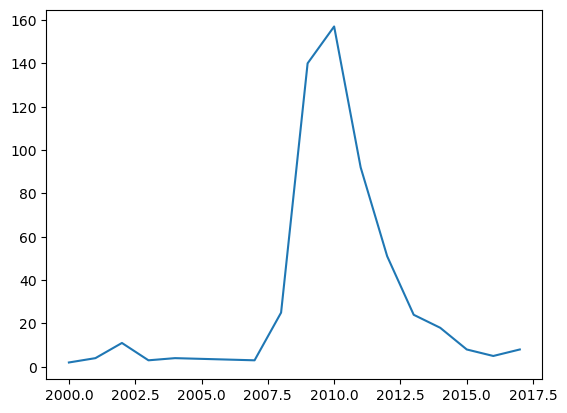

In [37]:
import matplotlib.pyplot as plt
plt.plot(closing_year)

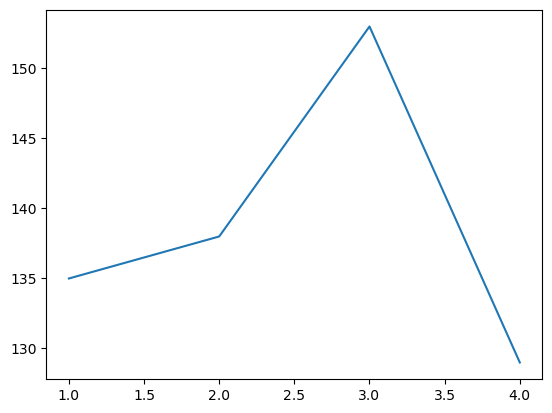

In [41]:
plt.plot(closing_quarter)